Đồ án cuối kì môn deeplearning.
---
Dự đoán phân lớp lợi nhuận của apple dựa trên giá cổ phiếu




In [1]:
from google.colab import drive
drive.mount('/content/drive')
'%cd/content/drive/MyDrive/DOAN_DEEPLEARNING/1.1 Sản Phẩm'
#cho data                    
#đường dẫn data
import pandas as pd
import matplotlib.pyplot as plt
#import thư viện 

url = 'drive/MyDrive/DOANDEEP/1.1 Sản Phẩm/Data_Price_Apple.csv'
#dọc data  từ file csvcsv
data   = pd.read_csv('drive/MyDrive/DOAN_DEEPLEARNING/1.1 Sản Phẩm/Data_Price_Apple.csv')
data.head()


Mounted at /content/drive


,NgayThang,Gia_MoCua,Gia_Tran,Gia_San,Gia_DongCua,KhoiLuongGD,LoiNhuan_Hay_Khong
0,12-12-1980,0.1003,0.1007,0.1003,0.1003,469033600,0
1,15-12-1980,0.0955,0.0955,0.0951,0.0951,175884800,1
2,16-12-1980,0.0885,0.0885,0.0881,0.0881,105728000,1
3,17-12-1980,0.0902,0.0907,0.0902,0.0902,86441600,0
4,18-12-1980,0.0929,0.0933,0.0929,0.0929,73449600,0


In [2]:
# Kiểm tra xem dữ liệu có bao nhiêu dòng và cột
data.shape


(10559, 7)

In [3]:
#Phát hiện các giá trị còn thiếu.
pd.isna(data)

,NgayThang,Gia_MoCua,Gia_Tran,Gia_San,Gia_DongCua,KhoiLuongGD,LoiNhuan_Hay_Khong
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
10554,False,False,False,False,False,False,False
10555,False,False,False,False,False,False,False
10556,False,False,False,False,False,False,False
10557,False,False,False,False,False,False,False


In [4]:
#Cho data dữ liệu lọc ra NgayThang,GiaMoCua,GiaTran,GiaTran,GiaDongCua,KhoiLuongGD,LoiNhuan
data[['NgayThang','Gia_MoCua','Gia_Tran','Gia_San','Gia_DongCua','KhoiLuongGD','LoiNhuan_Hay_Khong']]

,NgayThang,Gia_MoCua,Gia_Tran,Gia_San,Gia_DongCua,KhoiLuongGD,LoiNhuan_Hay_Khong
0,12-12-1980,0.1003,0.1007,0.1003,0.1003,469033600,0
1,15-12-1980,0.0955,0.0955,0.0951,0.0951,175884800,1
2,16-12-1980,0.0885,0.0885,0.0881,0.0881,105728000,1
3,17-12-1980,0.0902,0.0907,0.0902,0.0902,86441600,0
4,18-12-1980,0.0929,0.0933,0.0929,0.0929,73449600,0
...,...,...,...,...,...,...,...
10554,24-10-2022,147.1850,150.2300,146.0000,149.4500,75569074,0
10555,25-10-2022,150.0900,152.4900,149.3600,152.3400,73583421,0
10556,26-10-2022,150.9600,151.9900,148.0400,149.3500,87769611,1
10557,27-10-2022,148.0700,149.0460,144.1300,144.8000,108110875,1


In [5]:
# Khái quát về dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10559 entries, 0 to 10558
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NgayThang           10559 non-null  object 
 1   Gia_MoCua           10559 non-null  float64
 2   Gia_Tran            10559 non-null  float64
 3   Gia_San             10559 non-null  float64
 4   Gia_DongCua         10559 non-null  float64
 5   KhoiLuongGD         10559 non-null  int64  
 6   LoiNhuan_Hay_Khong  10559 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 577.6+ KB


In [6]:
# Kiểm tra xem có giá trị nào trong dataset bị Null hay không
data.isnull().sum()

NgayThang             0
Gia_MoCua             0
Gia_Tran              0
Gia_San               0
Gia_DongCua           0
KhoiLuongGD           0
LoiNhuan_Hay_Khong    0
dtype: int64

In [7]:
# Xem mối tương quan giữa các cột 
data.corr()

,Gia_MoCua,Gia_Tran,Gia_San,Gia_DongCua,KhoiLuongGD,LoiNhuan_Hay_Khong
Gia_MoCua,1.000000,0.999941,0.999926,0.999844,-0.219316,-0.000861
Gia_Tran,0.999941,1.000000,0.999913,0.999926,-0.218785,-0.003254
Gia_San,0.999926,0.999913,1.000000,0.999928,-0.220155,-0.003508
Gia_DongCua,0.999844,0.999926,0.999928,1.000000,-0.219485,-0.006072
KhoiLuongGD,-0.219316,-0.218785,-0.220155,-0.219485,1.000000,0.019101
LoiNhuan_Hay_Khong,-0.000861,-0.003254,-0.003508,-0.006072,0.019101,1.000000


In [8]:
data

,NgayThang,Gia_MoCua,Gia_Tran,Gia_San,Gia_DongCua,KhoiLuongGD,LoiNhuan_Hay_Khong
0,12-12-1980,0.1003,0.1007,0.1003,0.1003,469033600,0
1,15-12-1980,0.0955,0.0955,0.0951,0.0951,175884800,1
2,16-12-1980,0.0885,0.0885,0.0881,0.0881,105728000,1
3,17-12-1980,0.0902,0.0907,0.0902,0.0902,86441600,0
4,18-12-1980,0.0929,0.0933,0.0929,0.0929,73449600,0
...,...,...,...,...,...,...,...
10554,24-10-2022,147.1850,150.2300,146.0000,149.4500,75569074,0
10555,25-10-2022,150.0900,152.4900,149.3600,152.3400,73583421,0
10556,26-10-2022,150.9600,151.9900,148.0400,149.3500,87769611,1
10557,27-10-2022,148.0700,149.0460,144.1300,144.8000,108110875,1


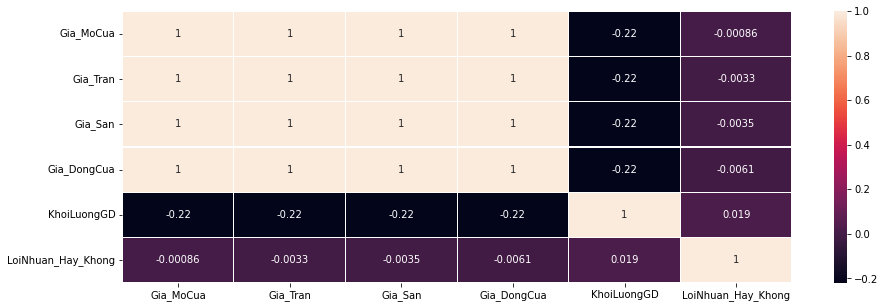

In [9]:
# Vẽ Biểu đồ ma trận mối tương quan giữa các cột 
import seaborn as sns
plt.subplots(figsize=(15, 5))
sns.heatmap(data.corr(), linewidths=0.1, annot=True)

In [10]:
# Thống kê mô tả dữ liệu
data.describe()


,Gia_MoCua,Gia_Tran,Gia_San,Gia_DongCua,KhoiLuongGD,LoiNhuan_Hay_Khong
count,10559.000000,10559.000000,10559.000000,10559.000000,1.055900e+04,10559.000000
mean,15.308827,15.483090,15.139373,15.318012,3.263275e+08,0.476466
std,33.973113,34.385796,33.580974,34.000790,3.201156e+08,0.499469
min,0.038800,0.038800,0.038400,0.038400,1.001504e+06,0.000000
25%,0.236800,0.242500,0.231650,0.236900,1.219792e+08,0.000000
50%,0.400200,0.406600,0.393000,0.399300,2.159780e+08,0.000000
75%,13.652700,13.783300,13.504000,13.647150,4.074518e+08,1.000000
max,181.877900,182.186600,178.382400,181.260500,2.147484e+09,1.000000


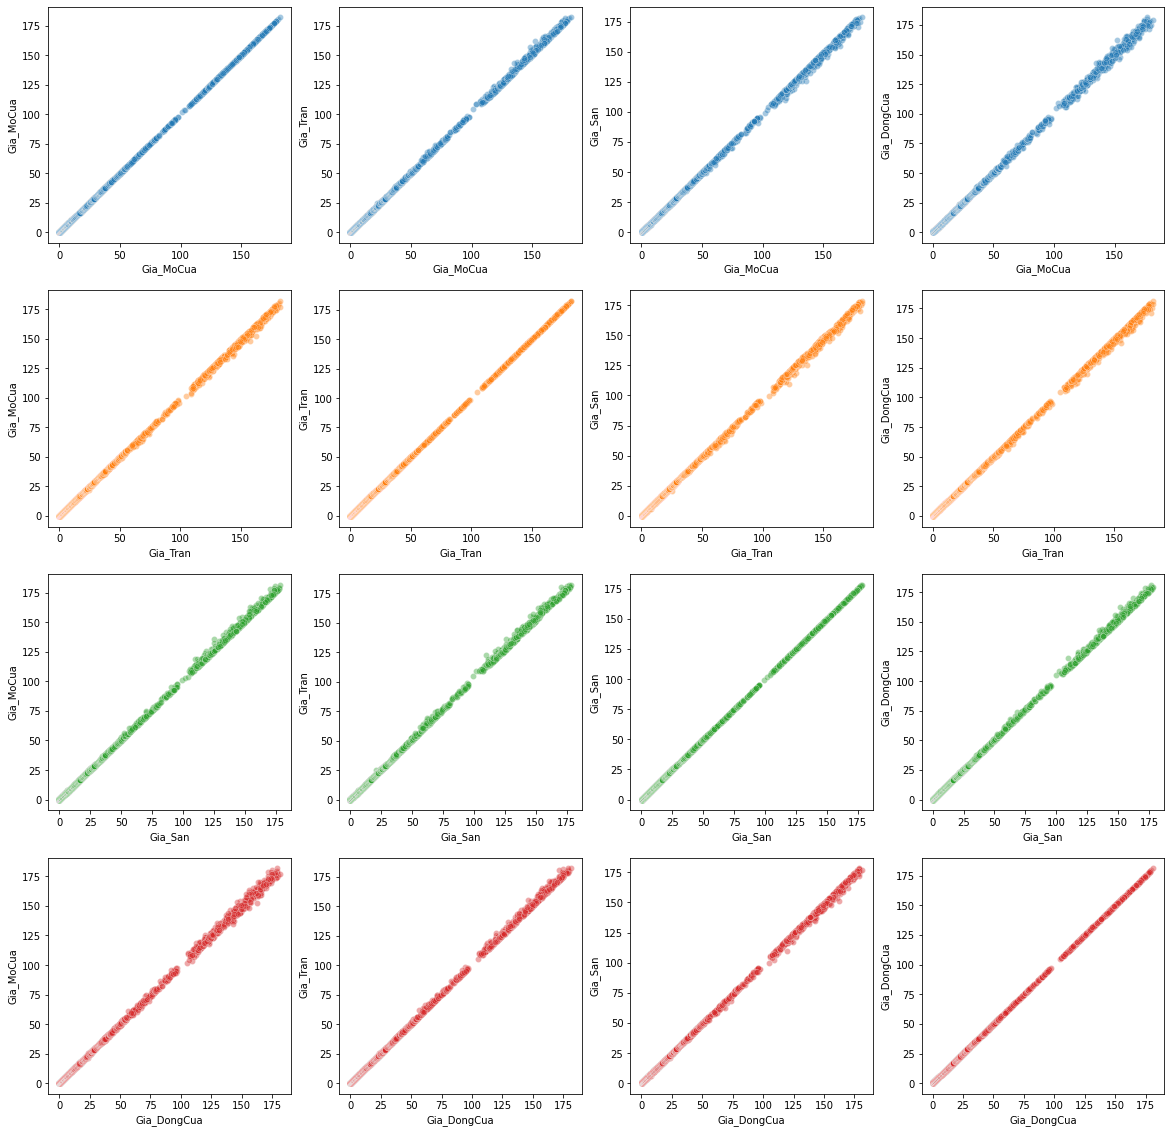

In [ ]:
#vẽ suplots để hể hiện độ tương quan của đồ thị 
plt.subplots(4,4,figsize=(20, 20))
n = 0
for x, c in zip(['Gia_MoCua','Gia_Tran','Gia_San','Gia_DongCua'], list(sns.color_palette())):
    for y in ['Gia_MoCua','Gia_Tran','Gia_San','Gia_DongCua']:
        plt.subplot(4,4,n+1)
        sns.scatterplot(x = x, y = y, data = data, color = c, alpha = 0.4)
        n += 1

In [11]:
# Phân chia dataset

# Lấy 4 Cột làm biến độc lập
inputs = data[['Gia_MoCua','Gia_Tran','Gia_San','Gia_DongCua']]

# Lấy 1 Cột làm biến phụ thuộc
targets = data['LoiNhuan_Hay_Khong']

# Lấy ngẫu nhiên 80% dòng để máy học và 20% dòng để kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( inputs, targets, train_size = 0.8, test_size=0.2, random_state=16,)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8447, 4) (8447,)
Test set: (2112, 4) (2112,)


In [13]:
# Cây Quyết Định
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Triển khai cây quyết định với độ đo là Entropy và độ sâu 
model_CayQuyetDinh = DecisionTreeClassifier(criterion='entropy')
model_CayQuyetDinh.fit(X_train, y_train)
prediction_CayQuyetDinh = model_CayQuyetDinh.predict(X_test)
CayQuyetDinh_Acc = accuracy_score(y_test, prediction_CayQuyetDinh)
print(f'Từ bộ dữ liệu có {len(data)} dòng ta lấy ra {len(X_train)} dòng cho máy học và dùng {len(X_test)} dòng để kiểm tra')
print(f'Cây Quyết Định cho ra kết quả: {CayQuyetDinh_Acc*100}% Độ Chính Xác')


Từ bộ dữ liệu có 10559 dòng ta lấy ra 8447 dòng cho máy học và dùng 2112 dòng để kiểm tra
Cây Quyết Định cho ra kết quả: 85.27462121212122% Độ Chính Xác


In [14]:
# Hồi Quy Logistic
from sklearn.linear_model import LogisticRegression
model_Logistic = LogisticRegression()
model_Logistic.fit(X_train, y_train)
prediction_Logistic = model_Logistic.predict(X_test)
Logistic_Acc = accuracy_score(y_test, prediction_Logistic)
print(f'Từ bộ dữ liệu có {len(data)} dòng ta lấy ra {len(X_train)} dòng cho máy học và dùng {len(X_test)} dòng để kiểm tra')
print(f'Hồi Quy Logistic cho ra kết quả: {Logistic_Acc*100}% Độ Chính Xác')

Từ bộ dữ liệu có 10559 dòng ta lấy ra 8447 dòng cho máy học và dùng 2112 dòng để kiểm tra
Hồi Quy Logistic cho ra kết quả: 79.26136363636364% Độ Chính Xác


Dự đoán bằng hồi quy tuyến tính

In [15]:
#import thư viện 
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn import linear_model

In [16]:
inputs = data[['Gia_MoCua','Gia_Tran','Gia_San','Gia_DongCua']]
# Lấy 1 Cột làm biến phụ thuộc
targets = data['LoiNhuan_Hay_Khong']

In [17]:
## Lấy ngẫu nhiên 80% dòng để máy học và 20% dòng để kiểm tra
X_train, X_test, y_train, y_test = train_test_split( inputs, targets, train_size = 0.8, test_size=0.2, random_state=16,)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8447, 4) (8447,)
Test set: (2112, 4) (2112,)


Mean Squared Error: 0.22726313235020973
Root Mean Squared Error: 0.4767212312769484
0.08791575899455373


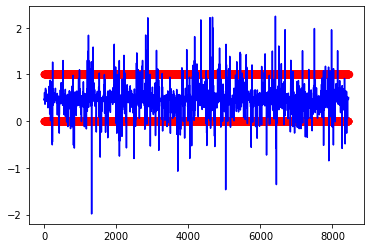

In [18]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
pred_y = model.predict(X_train)
x_ax=range(len(X_train))
plt.scatter(x_ax, y_train, lw=1.5, color="red",
         label="Kết quả thực tế")
plt.plot(x_ax, pred_y, lw=1.5, color="blue",
         label="Kết quả dự đoán")
# Hiển thị sai số.
mse = mean_squared_error(y_train, pred_y)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print(r2_score(y_train, pred_y))

Từ bộ dữ liệu có 10559 dòng ta lấy ra 8447 dòng cho máy học và dùng 2112 dòng để kiểm tra
Hồi Quy Tuyến Tính  cho ra kết quả: 79.26136363636364% Độ Chính Xác


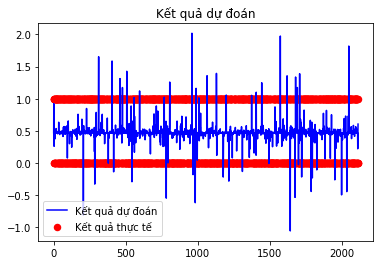

Mean Squared Error: 0.22726313235020973
Root Mean Squared Error: 0.4767212312769484
0.08791575899455373


In [19]:
# Dự đoán
from sklearn.linear_model import LinearRegression
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X_train, y_train)
prediction_LinearRegression = model_LinearRegression.predict(X_test)
LinearRegression_Acc = accuracy_score(y_test, prediction_Logistic)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
pred_y = model.predict(X_train)
pred_y_test = model.predict(X_test)
x_ax=range(len(X_test))
plt.scatter(x_ax, y_test, lw=1.5, color="red",
         label="Kết quả thực tế")
plt.plot(x_ax, pred_y_test, lw=1.5, color="blue",
         label="Kết quả dự đoán")
print(f'Từ bộ dữ liệu có {len(data)} dòng ta lấy ra {len(X_train)} dòng cho máy học và dùng {len(X_test)} dòng để kiểm tra')
print(f'Hồi Quy Tuyến Tính  cho ra kết quả: {LinearRegression_Acc*100}% Độ Chính Xác')
# Hiển thị sai số.
plt.title("Kết quả dự đoán")
plt.legend()
plt.show()

# Hiển thị sai số.
mse = mean_squared_error(y_train, pred_y)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print(r2_score(y_train, pred_y))

Tiếp tục dự đoán bằng Neural network (RNN )

In [ ]:
#Cài đặt mxnet
!pip install mxnet==1.6.0

In [ ]:
#cài đặt gói thư viện d2l mà bao gồm các hàm và lớp thường xuyên được sử dụng
!pip install -U d2l

In [ ]:
#Cài đặt thư viện matplotlib_inline
!pip install matplotlib-inline


In [ ]:
from d2l import mxnet as d2l
import math
from mxnet import autograd, np, npx, gluon
npx.set_np()

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [ ]:
#Biểu diễn onehot với các chỉ số  0,2
npx.one_hot(np.array([0, 2]), len(vocab))


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
#Hàm one_hot biến đổi một minibatch như vậy thành một tensor 3 chiều với kích thước chiều cuối cùng bằng kích thước bộ từ vựng
X = np.arange(batch_size * num_steps).reshape(batch_size, num_steps)
npx.one_hot(X.T, len(vocab)).shape

(35, 32, 28)

In [ ]:
#khởi tạo các tham số cho mô hình RNN
def get_params(vocab_size, num_hiddens, ctx):
    num_inputs = num_outputs = vocab_size

    def normal(shape):
        return np.random.normal(scale=0.01, size=shape, ctx=ctx)
    # # Đưa vào  Thông số lớp ẩn
    W_xh = normal((num_inputs, num_hiddens))
    W_hh = normal((num_hiddens, num_hiddens))
    b_h = np.zeros(num_hiddens, ctx=ctx)
    # Thông số của lớp đầu ra 
    W_hq = normal((num_hiddens, num_outputs))
    b_q = np.zeros(num_outputs, ctx=ctx)
    # Đính kèm các dải màu 
    params = [W_xh, W_hh, b_h, W_hq, b_q]
    for param in params:
        param.attach_grad()
    return params


In [ ]:
 #Khởi tạo trạng thái ẩn bằng hàm init_rnn_state.
#Hàm này trả về tuple gồm một ndarray chứa giá trị 0 và có kích thước là (kích thước batch, số nút ẩn).
def init_rnn_state(batch_size, num_hiddens, ctx):
    return (np.zeros(shape=(batch_size, num_hiddens), ctx=ctx), )
    #định nghĩa cách tính toán trạng thái ẩn và đầu ra tại một bước thời gian. Hàm kích hoạt ở đây là  tanh .
def rnn(inputs, state, params):
    # Hình dạng đầu vào: (num_steps, batch_size, vocab_size)
    W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    for X in inputs:
        H = np.tanh(np.dot(X, W_xh) + np.dot(H, W_hh) + b_h)
        Y = np.dot(H, W_hq) + b_q
        outputs.append(Y)
    return np.concatenate(outputs, axis=0), (H,)



    

In [ ]:
 #Sau khi đã định nghĩa tất cả các hàm, ta tạo một lớp để bao các hàm này lại và lưu trữ các tham số.
#   sử dụng  gói d2l để sử dụng !!!
class RNNModelScratch:
    """A RNN Model based on scratch implementations."""

    def __init__(self, vocab_size, num_hiddens, ctx,
                 get_params, init_state, forward):
        self.vocab_size, self.num_hiddens = vocab_size, num_hiddens
        self.params = get_params(vocab_size, num_hiddens, ctx)
        self.init_state, self.forward_fn = init_state, forward

    def __call__(self, X, state):
        X = npx.one_hot(X.T, self.vocab_size)
        return self.forward_fn(X, state, self.params)

    def begin_state(self, batch_size, ctx):
        return self.init_state(batch_size, self.num_hiddens, ctx)

        

In [ ]:
  #kiểm tra nhanh chiều của đầu vào và đầu ra, và xem chiều của trạng thái ẩn có thay đổi hay không.
num_hiddens, ctx = 512, d2l.try_gpu()
model = RNNModelScratch(len(vocab), num_hiddens, ctx, get_params,
                        init_rnn_state, rnn)
state = model.begin_state(X.shape[0], ctx)
Y, new_state = model(X.as_in_ctx(ctx), state)
Y.shape, len(new_state), new_state[0].shape

((1120, 28), 1, (32, 512))

In [ ]:
#dự đoán num_predicts ký tự tiếp theo dựa trên prefix
def predict_ch8(prefix, num_predicts, model, vocab, ctx):
    state = model.begin_state(batch_size=1, ctx=ctx)
    outputs = [vocab[prefix[0]]]

    def get_input():
        return np.array([outputs[-1]], ctx=ctx).reshape(1, 1)
    for y in prefix[1:]:  # Trạng thái khởi động với tiền tố
        _, state = model(get_input(), state)
        outputs.append(vocab[y])
    for _ in range(num_predicts):  # Dự đoán số bước  được thực hiện bằng num_predictpredict
        Y, state = model(get_input(), state)
        outputs.append(int(Y.argmax(axis=1).reshape(1)))
    return ''.join([vocab.idx_to_token[i] for i in outputs])

In [ ]:
# Sử dụng thư viện D21 để sử dụng cho các câu lệnh
def grad_clipping(model, theta):
    if isinstance(model, gluon.Block):
        params = [p.data() for p in model.collect_params().values()]
    else:
        params = model.params
    norm = math.sqrt(sum((p.grad ** 2).sum() for p in params))
    if norm > theta:
        for param in params:
            param.grad[:] *= theta / norm
# Sử dụng thư viện D21 để sử dụng cho các câu lệnh
def train_epoch_ch8(model, train_iter, loss, updater, ctx, use_random_iter):
    state, timer = None, d2l.Timer()
    metric = d2l.Accumulator(2)  # loss_sum, num_examples
    for X, Y in train_iter:
        if state is None or use_random_iter:
            # Khởi tạo trạng thái khi nó là lần lặp đầu tiên 
            # sử dụng các mẫu ngẫu nhiên 
            state = model.begin_state(batch_size=X.shape[0], ctx=ctx)
        else:
            for s in state:
                s.detach()
        y = Y.T.reshape(-1)
        X, y = X.as_in_ctx(ctx), y.as_in_ctx(ctx)
        with autograd.record():
            py, state = model(X, state)
            l = loss(py, y).mean()
        l.backward()
        grad_clipping(model, 1)
        updater(batch_size=1)  # Nó đã sẵn sàng để sử dụng  cho bài toán
        metric.add(l * y.size, y.size)
    return math.exp(metric[0]/metric[1]), metric[1]/timer.stop()

In [ ]:
# Dùng thư viện d21 để thực thi các câu lệnh
def train_ch8(model, train_iter, vocab, lr, num_epochs, ctx,
              use_random_iter=False):
    # Initialize
    loss = gluon.loss.SoftmaxCrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', ylabel='perplexity',
                            legend=['train'], xlim=[1, num_epochs])
    if isinstance(model, gluon.Block):
        model.initialize(ctx=ctx, force_reinit=True, init=init.Normal(0.01))
        trainer = gluon.Trainer(model.collect_params(),
                                'sgd', {'learning_rate': lr})

        def updater(batch_size):
            return trainer.step(batch_size)
    else:
        def updater(batch_size):
            return d2l.sgd(model.params, lr, batch_size)

    def predict(prefix):
        return predict_ch8(prefix, 50, model, vocab, ctx)
         # Huấn luyện và kiểm tra tiến trình của chương trình được thực thi
    for epoch in range(num_epochs):
        ppl, speed = train_epoch_ch8(
            model, train_iter, loss, updater, ctx, use_random_iter)
        if epoch % 10 == 0:
            print(predict('time traveller'))
            animator.add(epoch+1, [ppl])
    print('Perplexity %.1f, %d tokens/sec on %s' % (ppl, speed, ctx))
    print(predict('time traveller'))
    print(predict('traveller'))

Perplexity 13.9, 6817 tokens/sec on cpu(0)
time traveller the the ar anl on yimens an the the the she an an
travellerere the he the arere an the sis and al an the sher


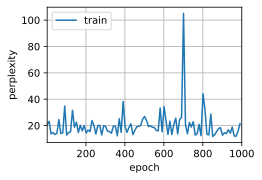

In [ ]:
#Train dữ liệu bằng sử dụng  câu lệnh num_epochs,
#lr = 1000 thể hiện số vòng lặp, số 1 thể hiện số lần lặp lại của câu lệnh
num_epochs, lr = 1000, 1
train_ch8(model, train_iter, vocab, lr, num_epochs, ctx)

Perplexity 1523.3, 5679 tokens/sec on cpu(0)
time travelleri ere e e e e t e m i m e m i m e m i m r l r h r 
traveller m e h e g e o e h e h e o e o e o e t e t e t e t


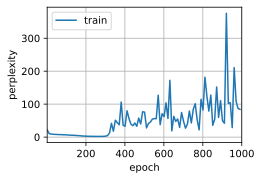

In [ ]:
#Train dữ liệu bằng sử dụng  câu lệnh num_epochs,
#lr = 1000 thể hiện số vòng lặp, số 2 thể hiện số lần lặp lại của câu lệnh
num_epochs, lr = 1000, 2
train_ch8(model, train_iter, vocab, lr, num_epochs, ctx)